Link to github repository: https://github.com/KasiaMacioszek/diffusion_processes

# Assignment 6

## Implementation of q-voter model

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150

In [3]:
BAM = nx.barabasi_albert_graph(100, 4)
WSM01 = nx.watts_strogatz_graph(100, 4, 0.01)
WSM02 = nx.watts_strogatz_graph(100, 4, 0.2)
RG = nx.erdos_renyi_graph(100, 0.15)

In [4]:
MC_STEPS = 10**6
Q1 = 4
Q2 = 3
N = 100

In [5]:
def get_neighbors(graph):
    """
    Return dictionary with list of neighbors for each node
    
    arguments:
    * graph (nx.Graph()) - graph to extract the data
    """
    d = {}
    for node in list(graph.nodes()):
        d[node] = list(graph.neighbors(node))
    return d

In [6]:
def get_opinions(opinion1_prop, nodes_num):
    """
    Return dictionary with opinion for each node
    
    arguments:
    * opinion1_prop (float, 0<opinion1_prop<1) - proportion of opinion 1 in initial state
    * nodes_num (int) - number of nodes
    """
    opinion1 = int(opinion1_prop*nodes_num)
    opinions = [-1]*(nodes_num - opinion1) + [1]*opinion1
    random.shuffle(opinions)
    opinions_dict = {i:opinions[i] for i in range(nodes_num)}
    return opinions_dict

In [8]:
def q_voter_model(graph, p, q, epsilon, opinion1, MC_steps):
    """
    Performs q-voter model on a given network
    
    arguments:
    * graph (nx.Graph()) - graph used to extract network data
    * p (float, 0<p<1) - probability of independence
    * q (int) - number of randomly picked neighbors
    * epsilon (float, 0<epsilon<1) - probability of a flip
    * opinion1 (float, 0<opinion1<1) - proportion of opinion 1 in initial state
    * MC_steps (int) - number of monte carlo steps
    """
    opinions = get_opinions(opinion1, nx.number_of_nodes(graph))
    neighbors = get_neighbors(graph)
    nodes = list(neighbors.keys())
    n = len(nodes)
    magn = np.zeros(MC_steps)
    for i in range(MC_steps):
        nodes = np.random.randint(0, n, size=n)
        ps = np.random.uniform(size=n) < p
        epsilons = np.random.uniform(size=n) < epsilon
        
        for j, node in enumerate(nodes):
            node_opinion = opinions[node]
            contrary = -1 if node_opinion == 1 else 1
            if ps[j]:
                opinions[node] = contrary if random.uniform(0, 1) < 0.5 else node_opinion
            else:
                curr_q = q
                if q > len(neighbors[node]):
                    curr_q = len(neighbors[node])
                neighbor_list = random.choices(neighbors[node], k=curr_q)
                neighbors_opinions = [opinions[i] for i in neighbor_list]
                if neighbors_opinions.count(node_opinion) == 0:
                    opinions[node] = contrary
                elif neighbors_opinions.count(contrary) != 0 and epsilons[j]:
                    opinions[node] = contrary
        magn[i] = sum(opinions.values())/n
    return opinions, magn

## Magnetization of the system

In [11]:
def simulate_q_voter_WSM(p, q, epsilon, wsm_prob, edges=4, MC_steps=1000, steps=100, opinion1=1):
    """
    Performs q-voter model on WS network averaged over given number of runs
    
    * p (float, 0<p<1) - probability of independence
    * q (int) - number of randomly picked neighbors
    * epsilon (float, 0<epsilon<1) - probability of a flip
    * wsm_prob (float, 0<wsm_prob<1) - probability of reconnection in WS graph
    * edges (int) - K parameter for WS network
    * MC_steps (int) - number of monte carlo steps
    * steps (int) - number of steps to average over
    * opinion1 (float, 0<=opinion1<=1) - proportion of opinion 1 in initial state
    """
    graph = nx.watts_strogatz_graph(N, edges, wsm_prob)
    results = np.zeros((steps, MC_steps))
    for i in range(steps):
        _, magn = q_voter_model_new(graph, p, q, epsilon, opinion1, MC_steps)
        results[i] = abs(magn)
    return np.mean(results, axis = 0)

In [10]:
def simulate_q_voter_BA(p, q, epsilon, edges=4, MC_steps=1000, steps=100, opinion1=1):
    """
    Performs q-voter model on BA network averaged over given number of runs
    
    * p (float, 0<p<1) - probability of independence
    * q (int) - number of randomly picked neighbors
    * epsilon (float, 0<epsilon<1) - probability of a flip
    * edges (int) - K parameter for WS network
    * MC_steps (int) - number of monte carlo steps
    * steps (int) - number of steps to average over
    * opinion1 (float, 0<=opinion1<=1) - proportion of opinion 1 in initial state
    """
    graph = nx.barabasi_albert_graph(N, edges)
    results = np.zeros((steps, MC_steps))
    for i in range(steps):
        _, magn = q_voter_model(graph, p, q, epsilon, opinion1, MC_steps)
        results[i] = abs(magn)
    return np.mean(results, axis = 0)

In [13]:
res = simulate_q_voter_BA(0.5, 4, 0.1, edges=4, MC_steps=1000, steps=100, opinion1=0.5)

In [14]:
p_range = np.arange(0, 0.52, 0.02)
epsilon1 = 0.1
graph_edges1 = 4
steps = 100
op1_p = 0.5
time = range(MC_STEPS)

## Time evolution of magnetization for WS(100, 4, 0.01)

In [18]:
MC = 1000
time = range(MC)
epsilon0 = 0

In [35]:
magn_time = np.zeros((len(p_range), MC))

In [22]:
magn_avg = np.zeros((len(p_range), MC))

In [36]:
for i, p in enumerate(p_range):
    print(i)
    magn_avg[i] = simulate_q_voter_WSM_new(p, Q1, epsilon0, 0.01, graph_edges1, MC_steps=MC, steps=100, opinion1=1)
    _, magn_time[i] = q_voter_model_new(WSM01, p, Q1, epsilon0, 1, MC)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [29]:
first_ps = int(len(p_range))/2

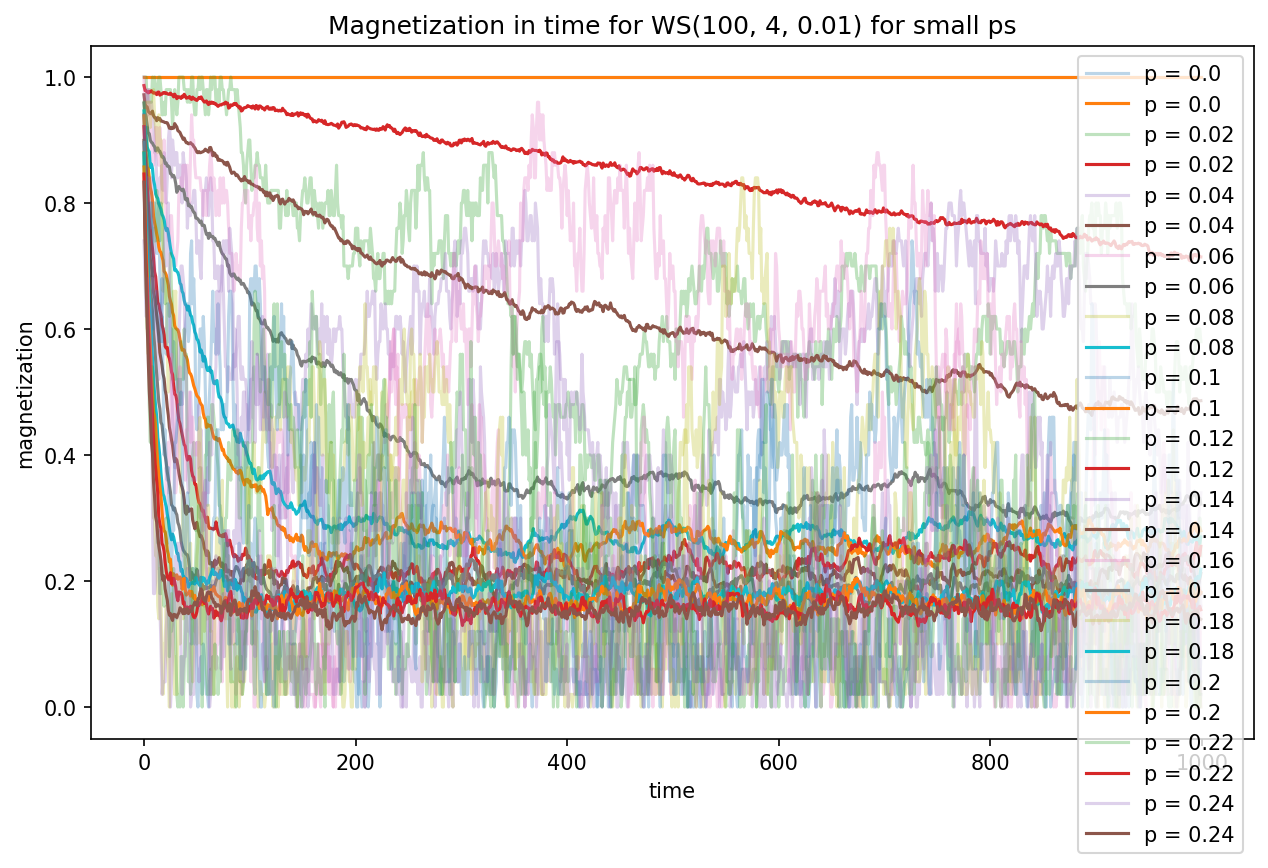

In [39]:
for i, p in enumerate(p_range):
    if i < first_ps:
        plt.plot(time, abs(magn_time[i]), label=f"p = {p}", alpha=0.3)
        plt.plot(time, magn_avg[i], label=f"p = {p}")
plt.legend()
plt.xlabel('time')
plt.ylabel('magnetization')
plt.title('Magnetization in time for WS(100, 4, 0.01) for small ps')
plt.savefig('wsm_smallp.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


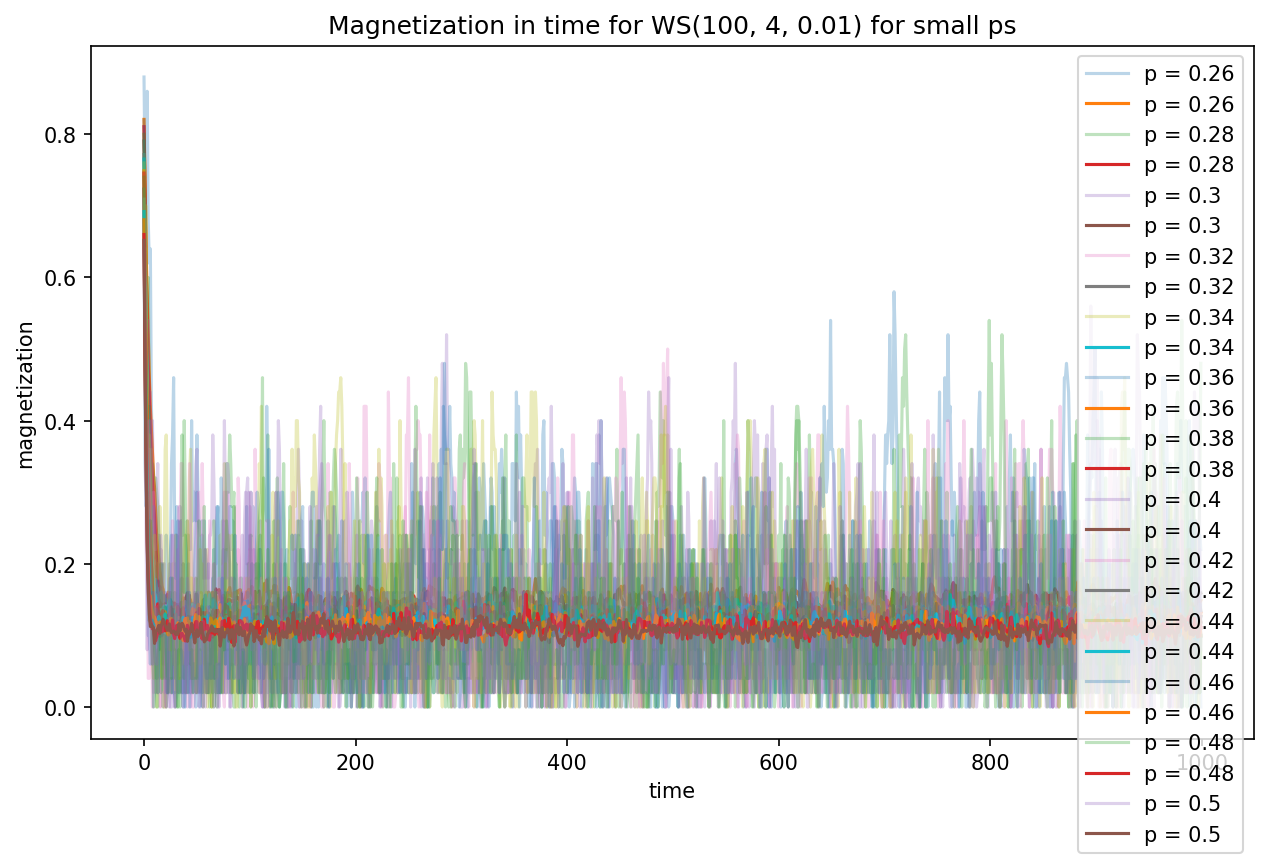

In [40]:
for i, p in enumerate(p_range):
    print(i)
    if i >= first_ps:
        plt.plot(time, abs(magn_time[i]), label=f"p = {p}", alpha=0.3)
        plt.plot(time, magn_avg[i], label=f"p = {p}")
plt.legend()
plt.xlabel('time')
plt.ylabel('magnetization')
plt.title('Magnetization in time for WS(100, 4, 0.01) for small ps')
plt.savefig('wsm_bigp.png')

In [ ]:
final_wsm_e0 = [magn_time, magn_avg]
df = pd.DataFrame(final_wsm_e0, columns = ['x', 'avg'])
df.to_csv('final_wsm_e0.csv')

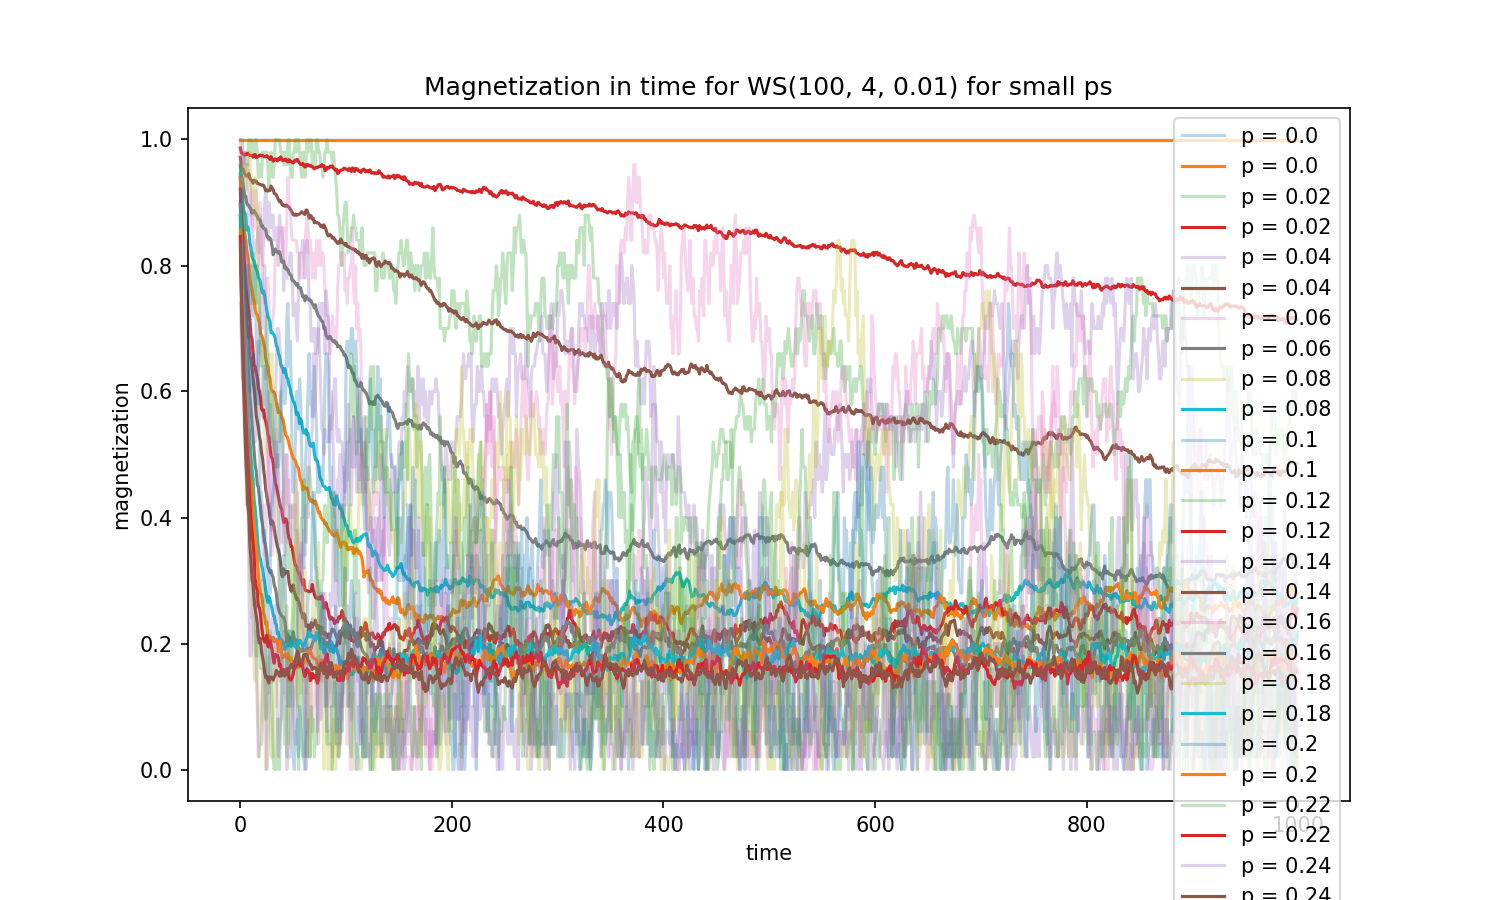

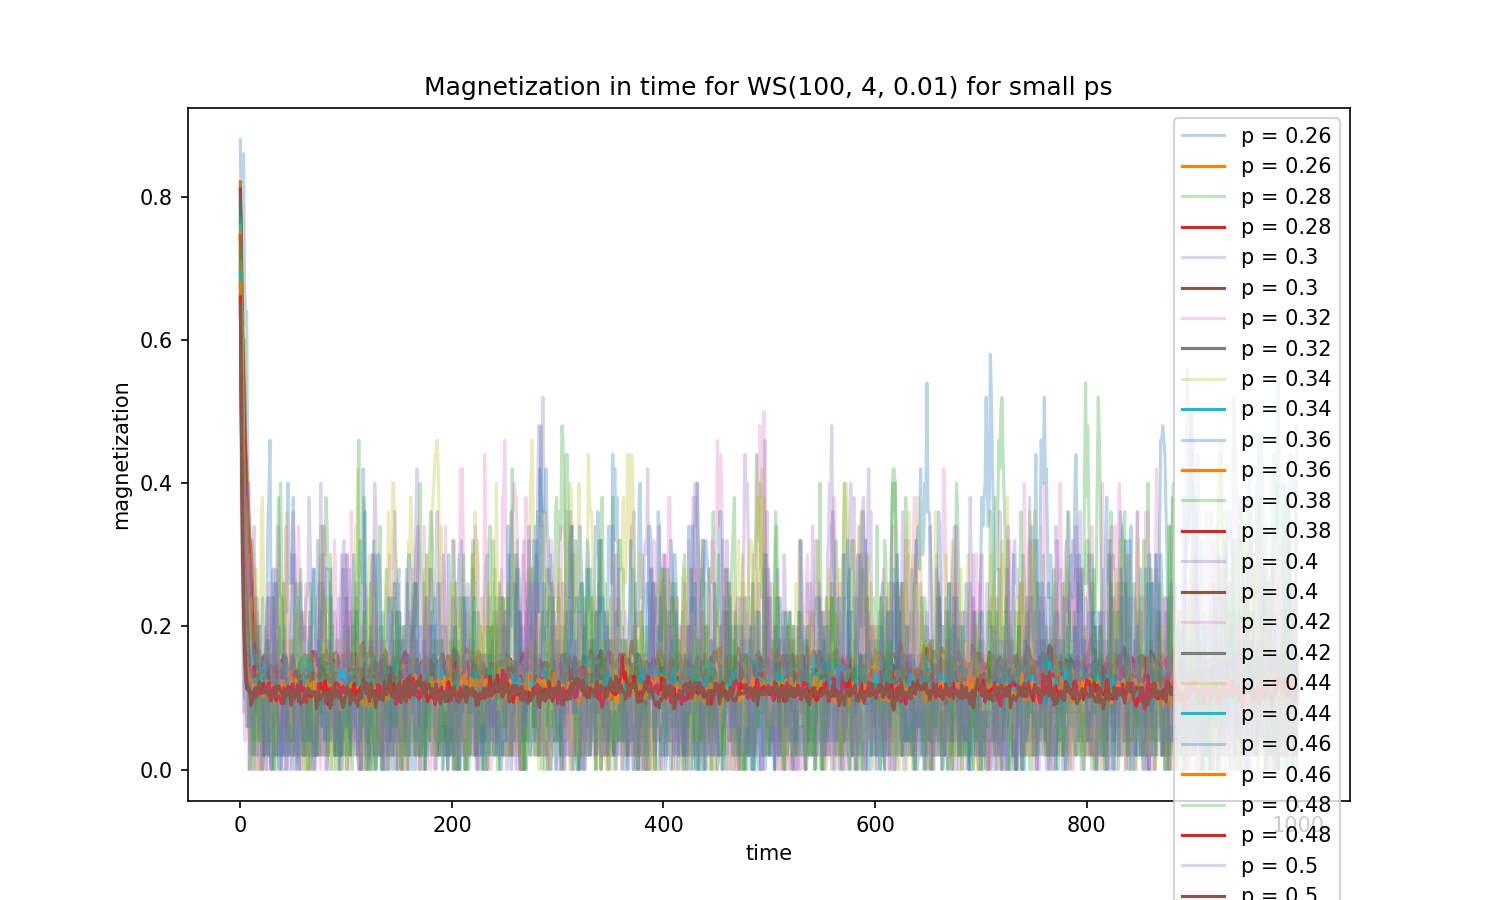

### Conclusions

We see that averaged plots don't have as many fluctuations as the ones from single run, which is expected. We also see that for $p=0$ the model stays in the state where there is only one opinion. However, the bigger p we have, the faster the network converges to a state where we have two opinions with equal proportion, but this behavior is stronger for $p < 0.25$. For $p's$ higher than this value we have almost the same behavior.

## Magnetization as a function of independence

In [34]:
p_range = np.arange(0, 0.52, 0.02)
epsilon0 = 0
epsilon1 = 0.15

### q = 4 

In [ ]:
final_magn_q4_WS1 = np.zeros(len(p_range))
final_magn_q4_WS2 = np.zeros(len(p_range))
final_magn_q4_BA = np.zeros(len(p_range))

In [46]:
for i, p in enumerate(p_range):
    if i > 19:
        print(i)
        final_magn_q4_WS1[i] = simulate_q_voter_WSM(p, Q1, epsilon0, 0.01, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]
        final_magn_q4_WS2[i] = simulate_q_voter_WSM(p, Q1, epsilon0, 0.2, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]
        final_magn_q4_BA[i] = simulate_q_voter_BA(p, Q1, epsilon0, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]

20
21
22
23
24
25


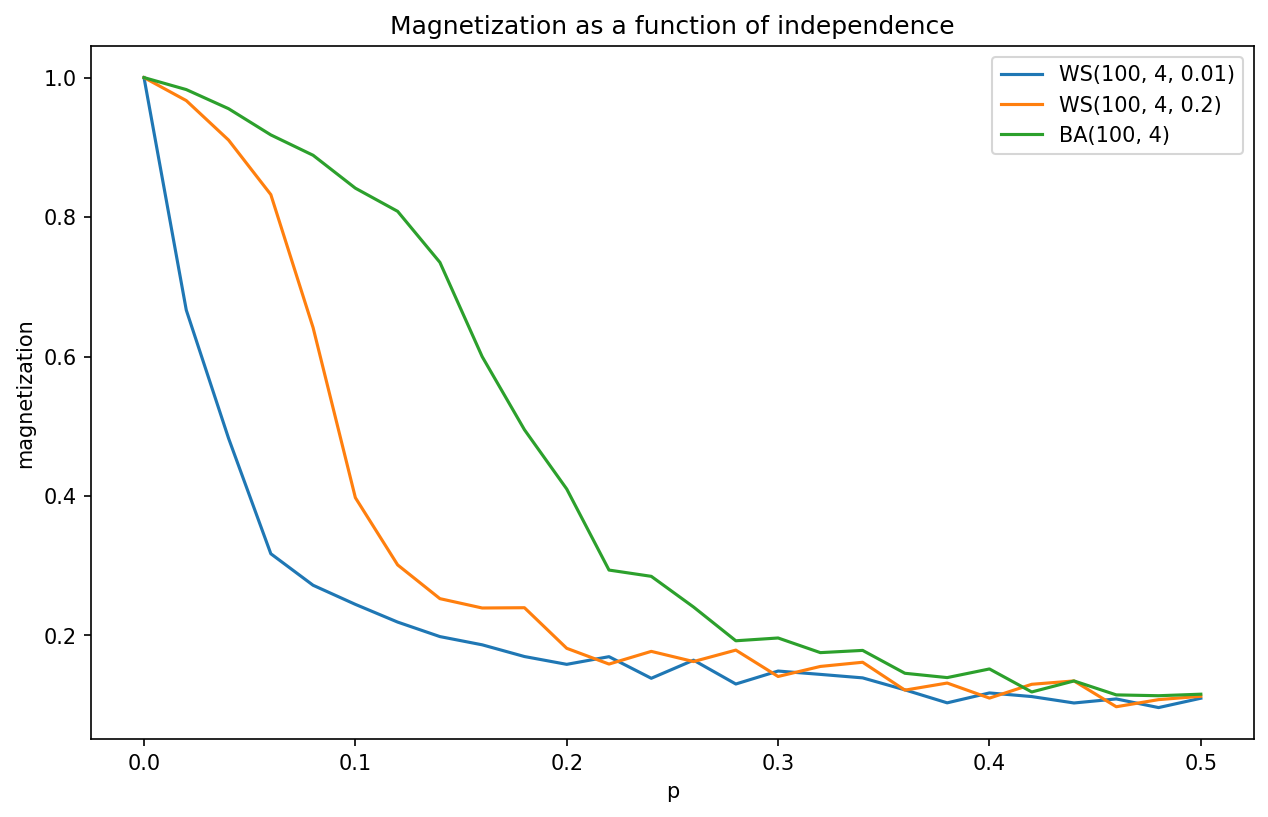

In [47]:
plt.plot(p_range, final_magn_q4_WS1, label='WS(100, 4, 0.01)')
plt.plot(p_range, final_magn_q4_WS2, label='WS(100, 4, 0.2)')
plt.plot(p_range, final_magn_q4_BA, label='BA(100, 4)')
plt.xlabel('p')
plt.ylabel('magnetization')
plt.legend()
plt.title("Magnetization as a function of independence")
plt.savefig('final_magn_q4.png')

In [49]:
final_q4 = [final_magn_q4_WS1, final_magn_q4_WS2, final_magn_q4_BA]
df = pd.DataFrame(final_q4, columns = p_range)
df.to_csv('final_magn_q4.csv')

$\epsilon = 0$

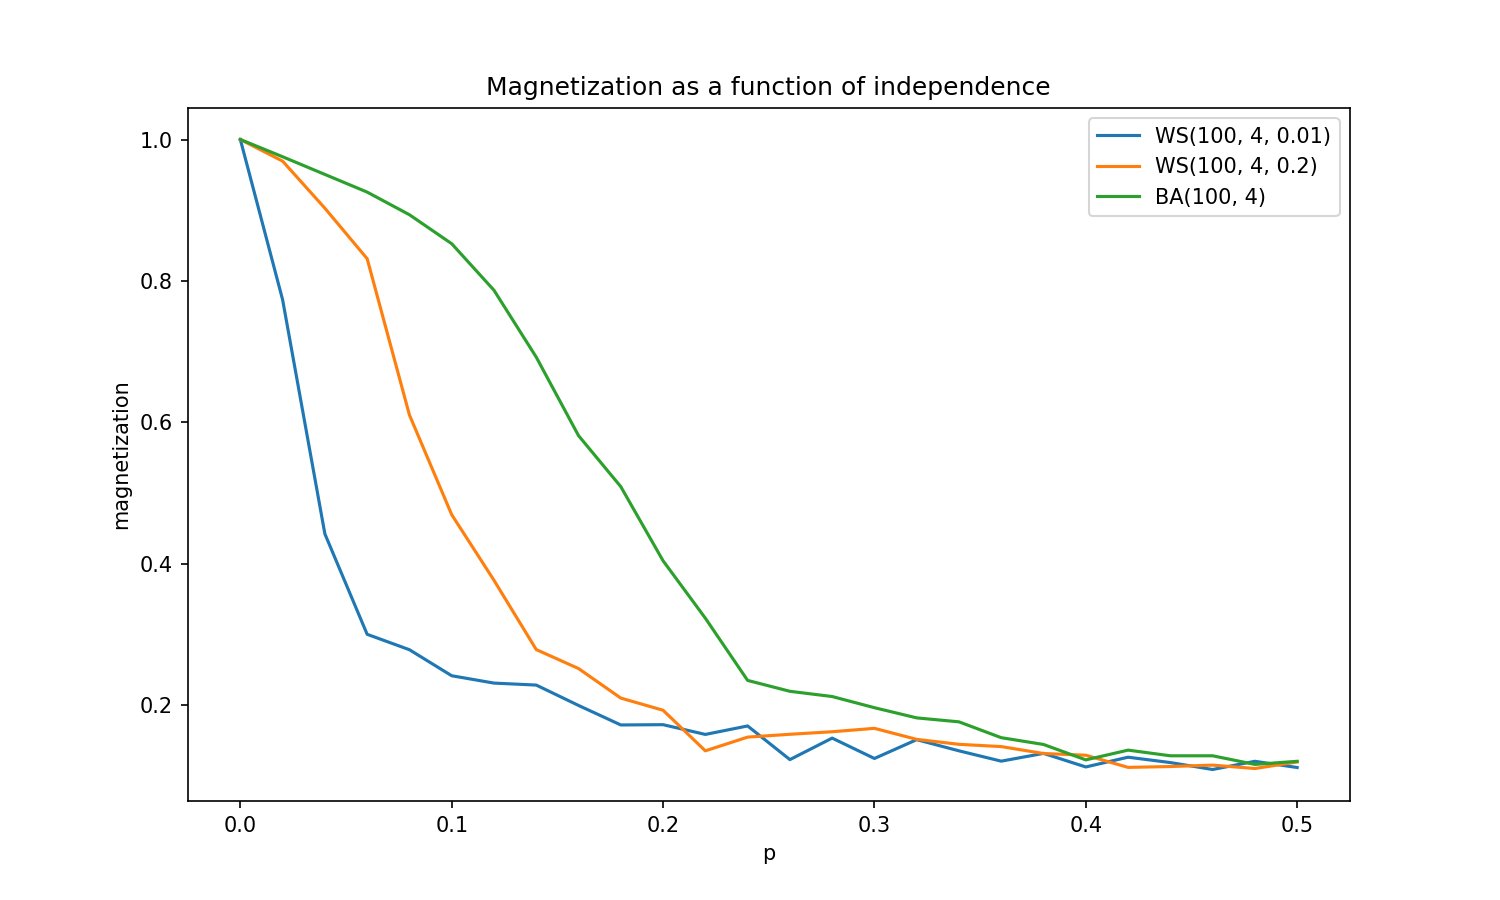

$\epsilon = 0.15$

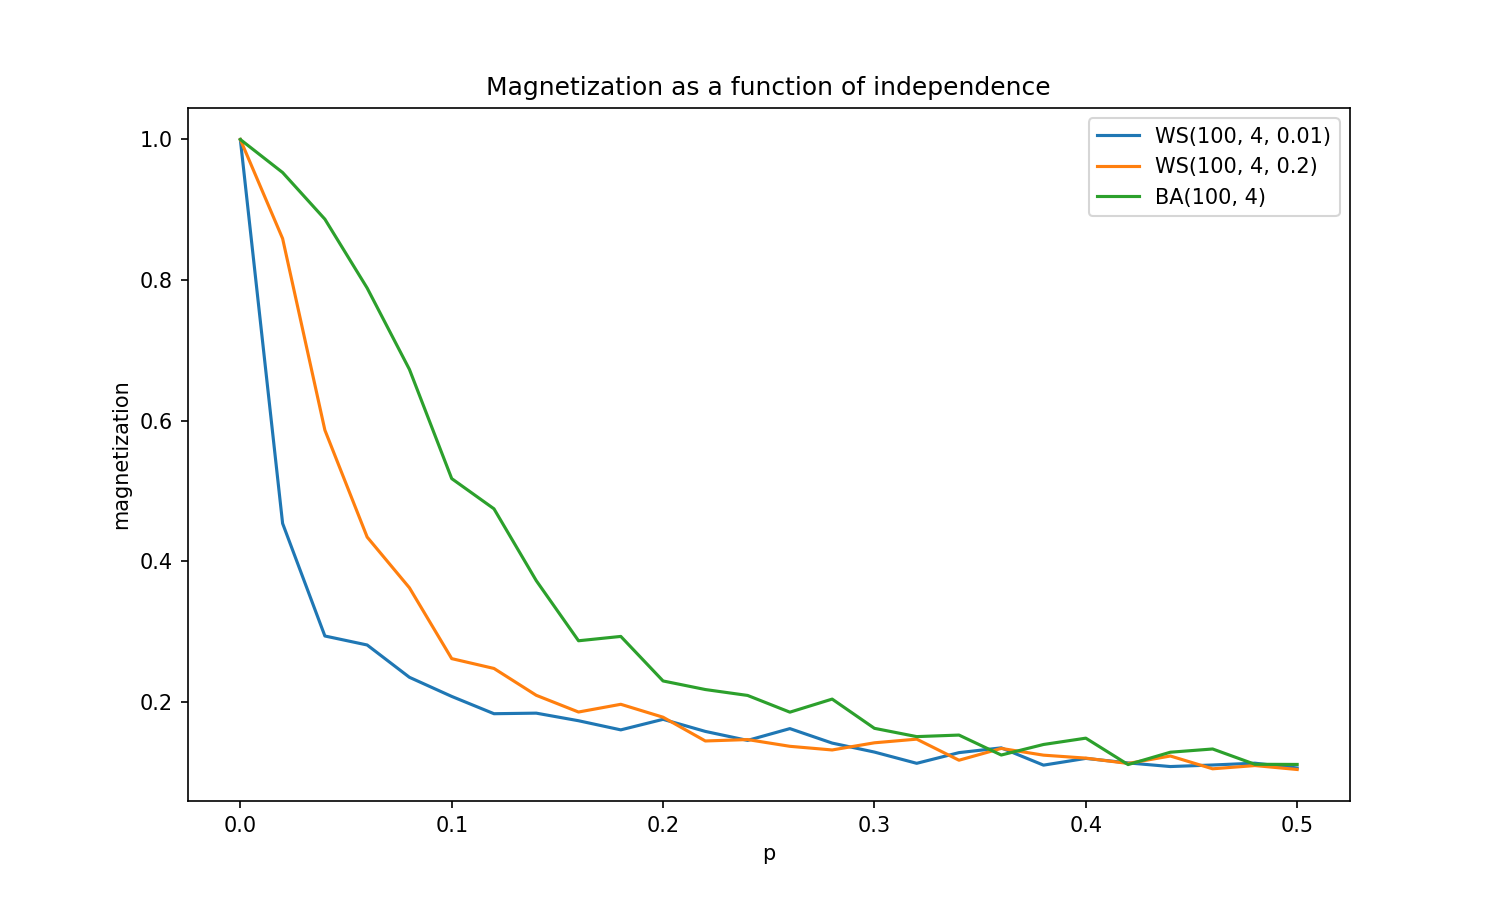

### q = 3

In [15]:
final_magn_q3_WS1 = np.zeros(len(p_range))
final_magn_q3_WS2 = np.zeros(len(p_range))
final_magn_q3_BA = np.zeros(len(p_range))

NameError: name 'p_range' is not defined

In [22]:
for i, p in enumerate(p_range):
    final_magn_q3_WS1[i] = simulate_q_voter_WSM(p, Q2, epsilon1, 0.01, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]
    final_magn_q3_WS2[i] = simulate_q_voter_WSM(p, Q2, epsilon1, 0.2, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]
    final_magn_q3_BA[i] = simulate_q_voter_BA(p, Q2, epsilon1, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


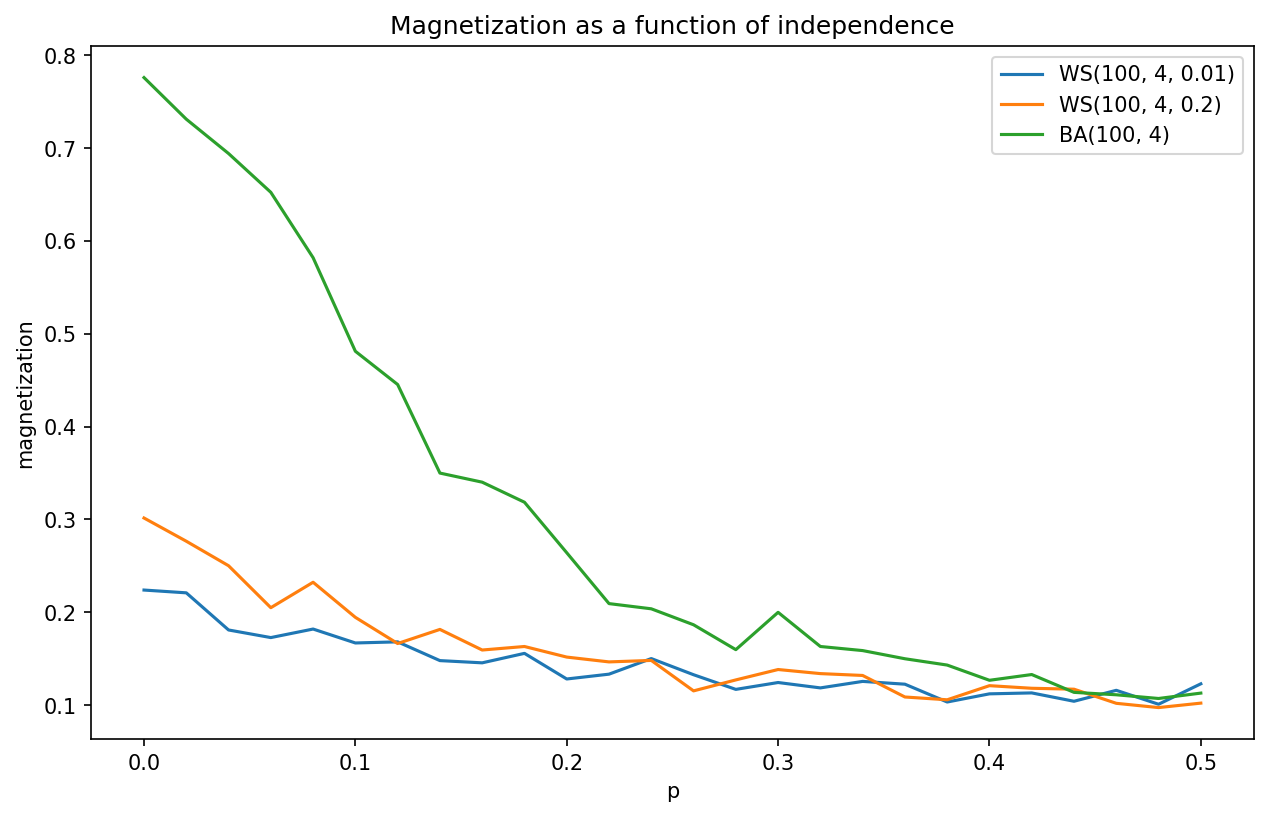

In [23]:
plt.plot(p_range, final_magn_q3_WS1, label='WS(100, 4, 0.01)')
plt.plot(p_range, final_magn_q3_WS2, label='WS(100, 4, 0.2)')
plt.plot(p_range, final_magn_q3_BA, label='BA(100, 4)')
plt.xlabel('p')
plt.ylabel('magnetization')
plt.legend()
plt.title("Magnetization as a function of independence")
plt.savefig('p_q3.png')

$\epsilon = 0$

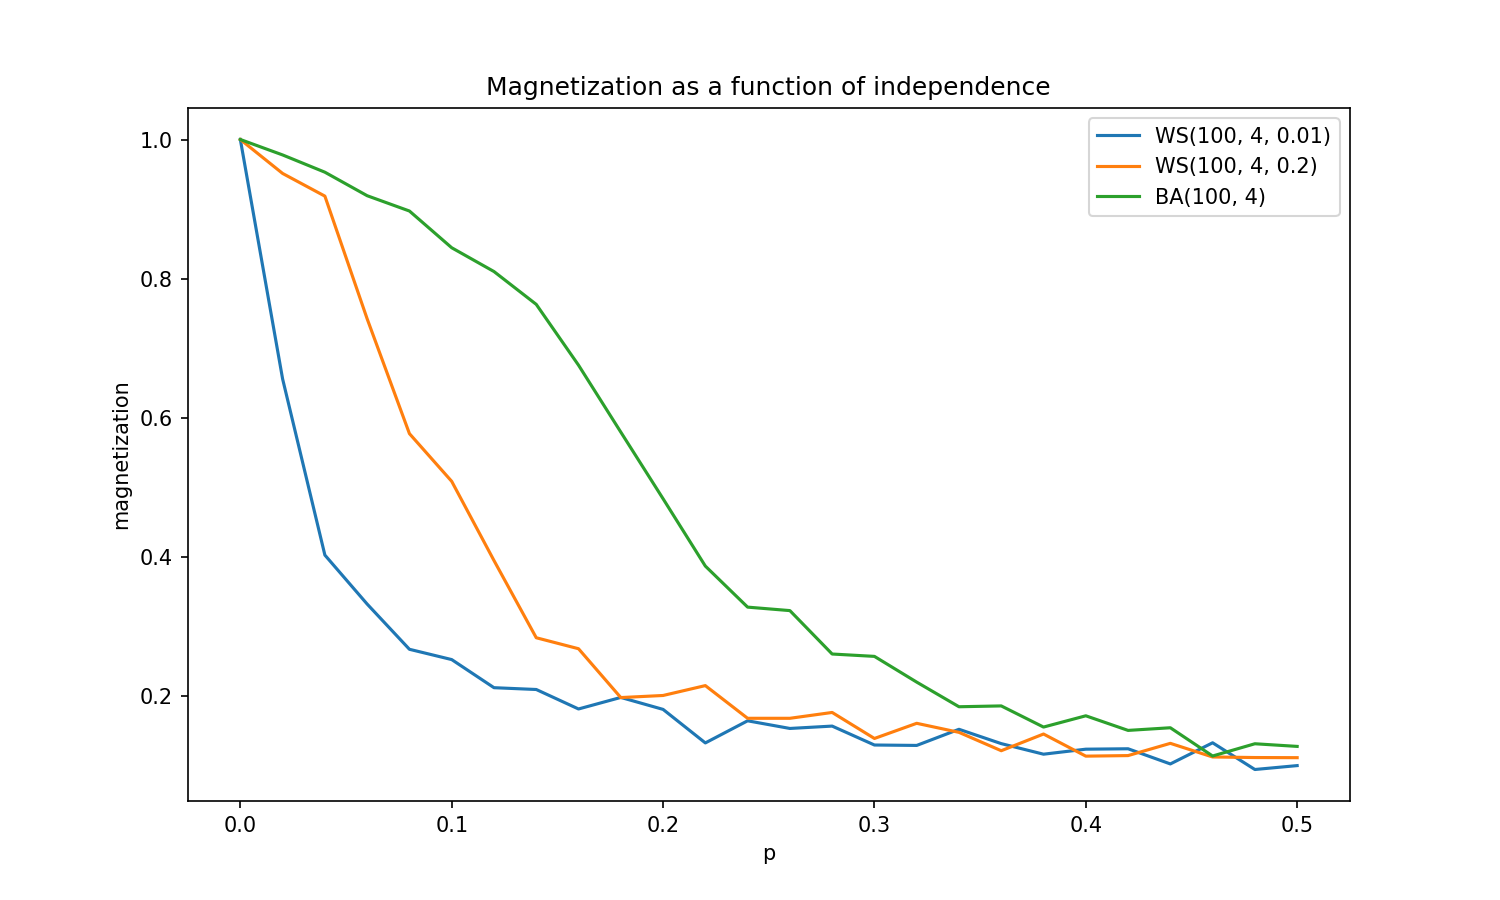

$\epsilon = 0.15$

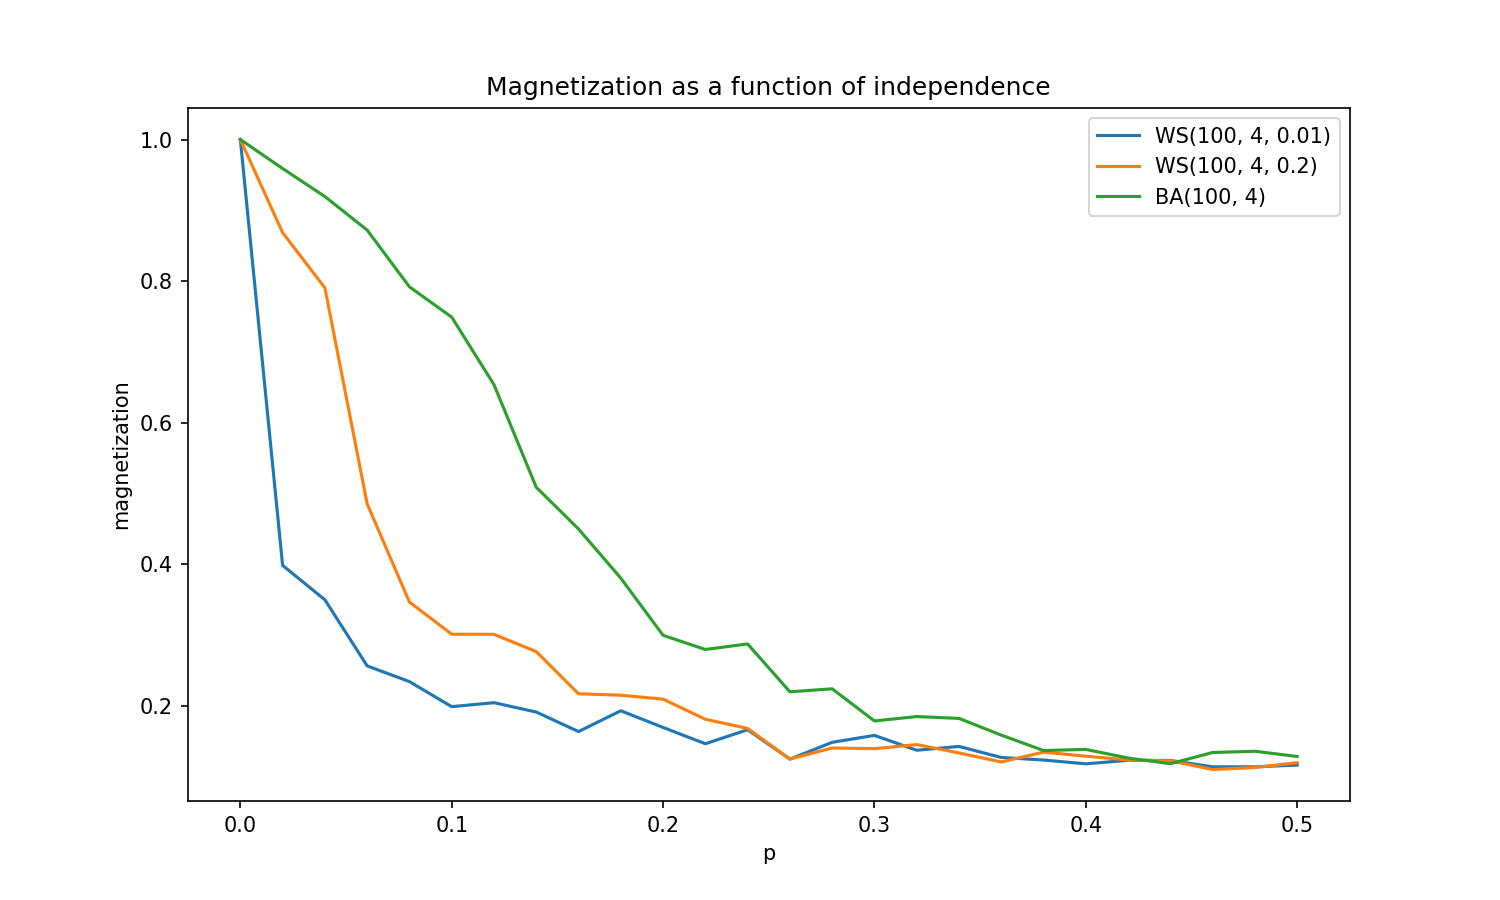

### WS(100, 4, 0.01)

In [25]:
final_magn_q1_WS1 = np.zeros(len(p_range))
final_magn_q2_WS1 = np.zeros(len(p_range))
final_magn_q4_WS1 = np.zeros(len(p_range))
for i, p in enumerate(p_range):
    final_magn_q1_WS1[i] = simulate_q_voter_WSM(p, 1, epsilon1, 0.01, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]
    final_magn_q2_WS1[i] = simulate_q_voter_WSM(p, 2, epsilon1, 0.01, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]
    final_magn_q4_WS1[i] = simulate_q_voter_WSM(p, Q1, epsilon1, 0.01, edges=4, MC_steps=10**6, steps=100, opinion1=1)[-1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


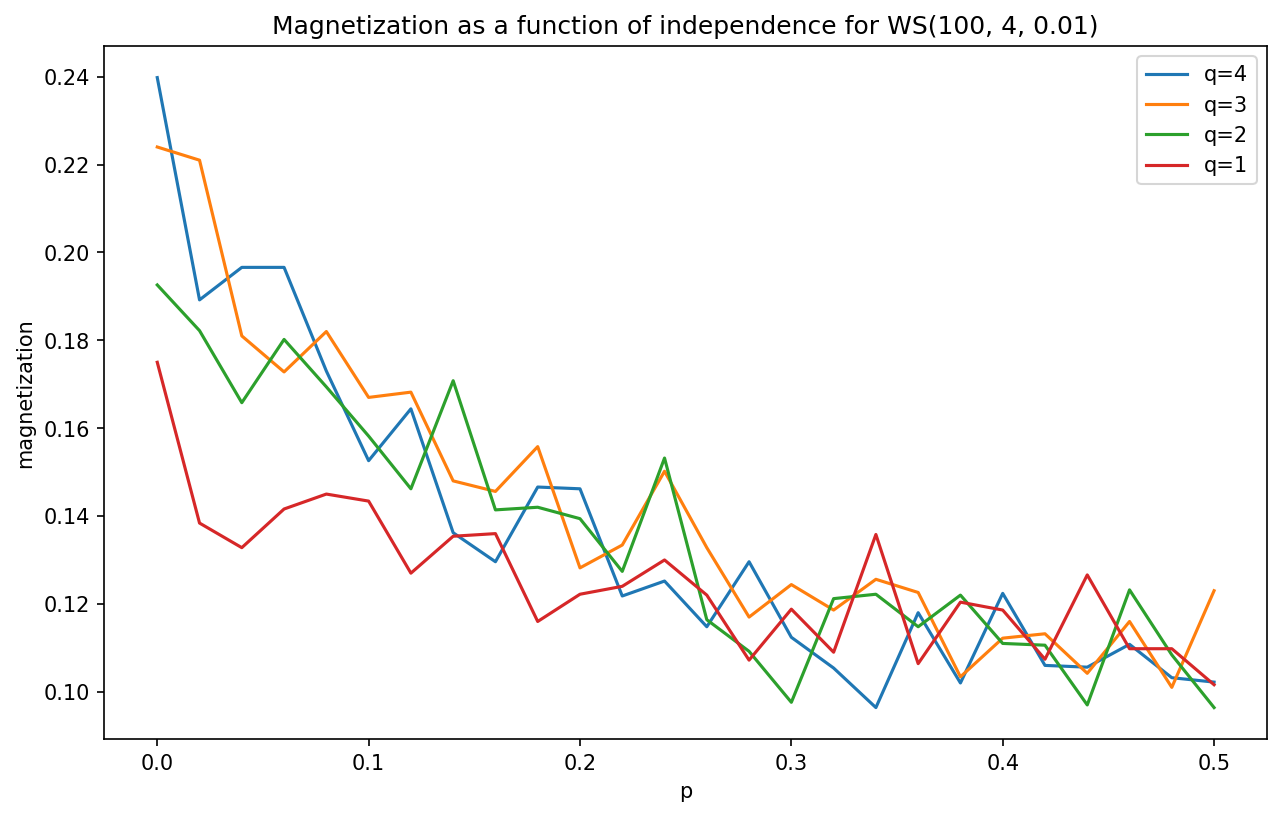

In [26]:
plt.plot(p_range, final_magn_q4_WS1, label='q=4')
plt.plot(p_range, final_magn_q3_WS1, label='q=3')
plt.plot(p_range, final_magn_q2_WS1, label='q=2')
plt.plot(p_range, final_magn_q1_WS1, label='q=1')
plt.xlabel('p')
plt.ylabel('magnetization')
plt.legend()
plt.title("Magnetization as a function of independence for WS(100, 4, 0.01)")
plt.savefig('p_ws.png')

$\epsilon = 0$

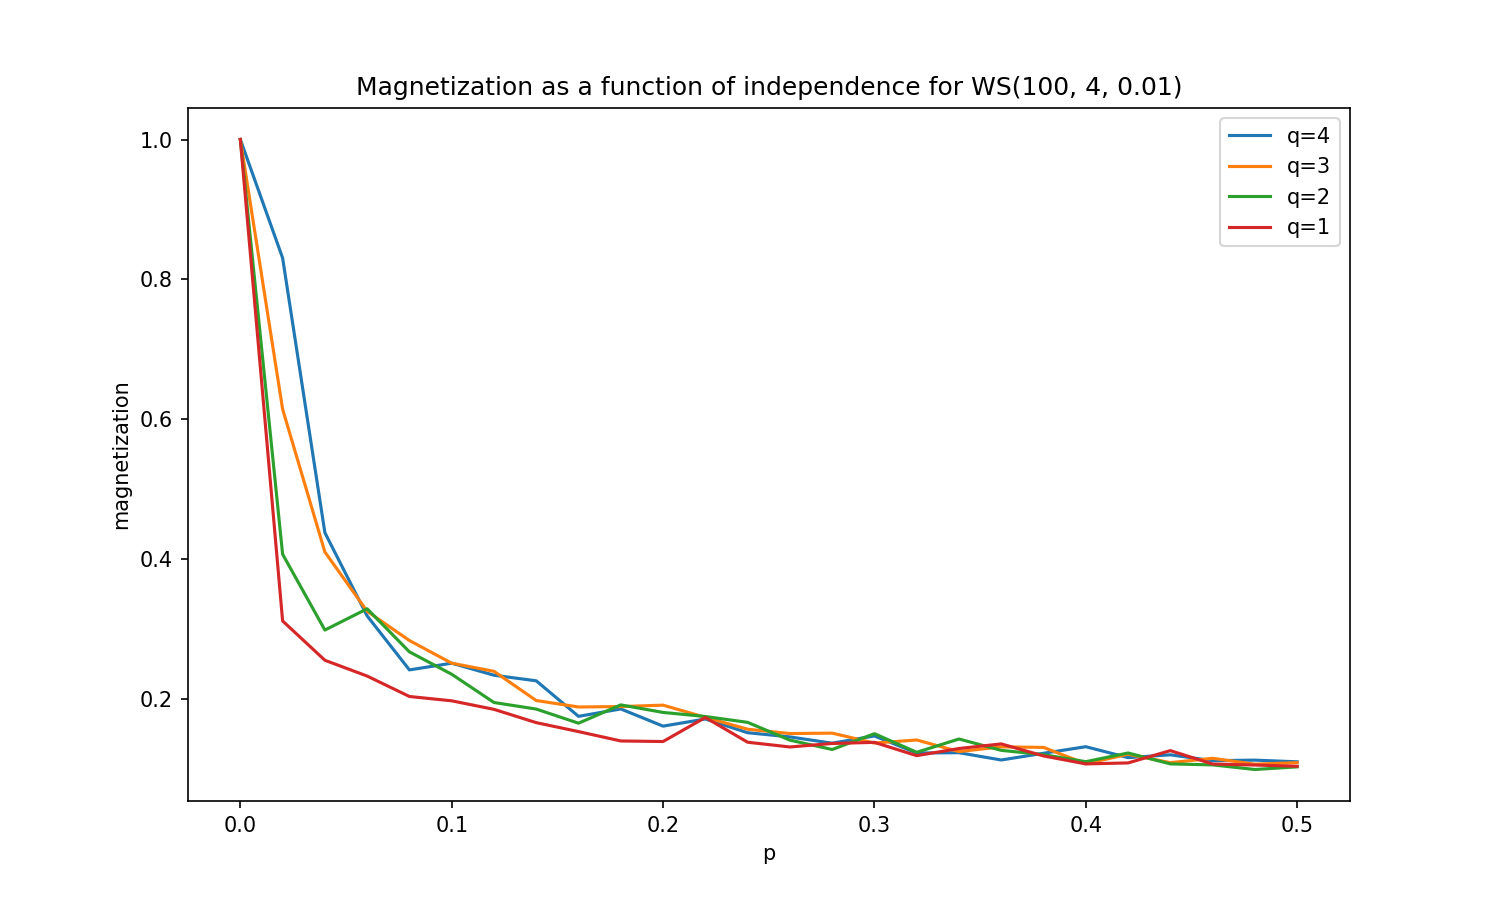

$\epsilon = 0.25$

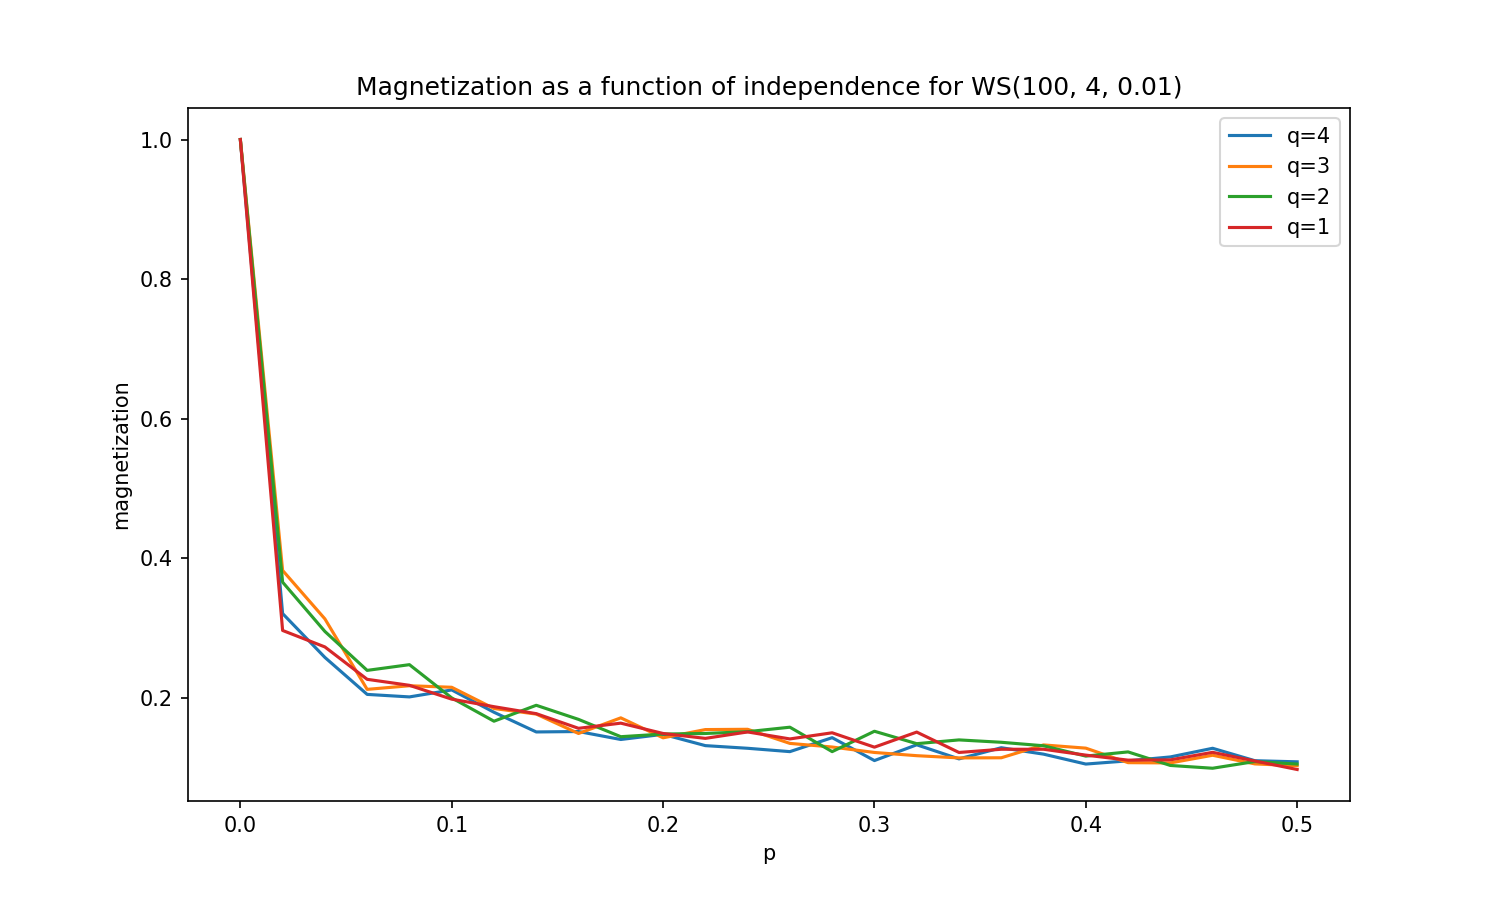

### Conclusions

On above figures we see that higher values of $\epsilon$ cause that the network converges faster to a state where there's an equal proportion of both opinions. In every case $WS(100, 4, 0.01)$ converges to such state quicker than other types of networks, while $BA(100, 4)$ is more likely to converge to winning of one opinion than other networks.

We also can observe that for smaller $q$ the magnetization is higher for all values of $p$ and all $\epsilon s$. The magnetization for smaller $p$ is always higher as the proportion of opinions is much different than 1:1. However for higher $p's$ the magnetization converges to 0.

For $WS(100, 4, 0.01)$ (last two figures) we see that differences between q's are rather small, especially for higher $\epsilon$. 

#### Additional information

To make the model work on networks given on the assignment I decided to choose all agent's neighbors as q-lobby if the agent's degree is too small. I tried a different approach where I regenerate the network, but it caused computational issues.